In [1]:
%cd /content/drive/MyDrive/Datasets/Dunnhumby

/content/drive/MyDrive/Datasets/Dunnhumby


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
#load the data
df = pd.read_csv("hh_demographic.csv").dropna()
df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [4]:
#Creating DF without household key
data = df.iloc[:,:-1]
data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown


In [5]:
#Transform character variables
data = pd.get_dummies(data, drop_first = True)
data.head()

,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,...,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE_DESC_25-34,801.0,0.177278,0.382143,0.0,0.0,0.0,0.0,1.0
AGE_DESC_35-44,801.0,0.242197,0.428681,0.0,0.0,0.0,0.0,1.0
AGE_DESC_45-54,801.0,0.359551,0.480169,0.0,0.0,0.0,1.0,1.0
AGE_DESC_55-64,801.0,0.073658,0.261377,0.0,0.0,0.0,0.0,1.0
AGE_DESC_65+,801.0,0.089888,0.286199,0.0,0.0,0.0,0.0,1.0
MARITAL_STATUS_CODE_B,801.0,0.146067,0.353394,0.0,0.0,0.0,0.0,1.0
MARITAL_STATUS_CODE_U,801.0,0.429463,0.495309,0.0,0.0,0.0,1.0,1.0
INCOME_DESC_125-149K,801.0,0.047441,0.212712,0.0,0.0,0.0,0.0,1.0
INCOME_DESC_15-24K,801.0,0.092385,0.289749,0.0,0.0,0.0,0.0,1.0
INCOME_DESC_150-174K,801.0,0.037453,0.189988,0.0,0.0,0.0,0.0,1.0


Text(0.5, 0, 'number of components')

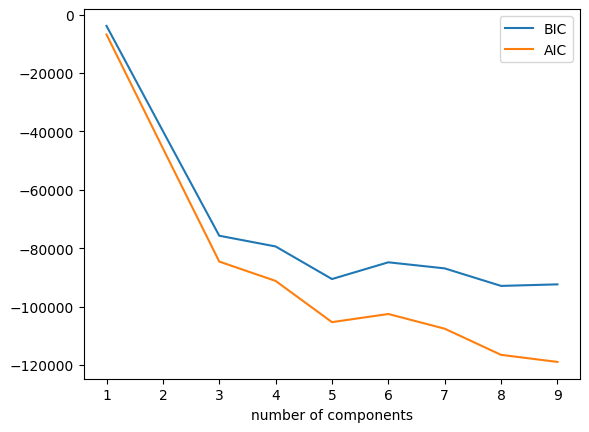

In [7]:
#Finding Optimal Number of clusters
n_components = np.arange(1,10)

#Model loop
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(data) for n in n_components]
#Plotting
plt.plot(n_components,
         [m.bic(data) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(data) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')

In [8]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 5,
                        random_state = 1502).fit(data)

In [9]:
#Prediction
cluster = pd.Series(model.predict(data))
df['Cluster'] = cluster
df.head(2)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Cluster
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,3
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,3


In [10]:
#how many people per cluster
df.Cluster.value_counts()

2    228
1    199
3    154
4    119
0    101
Name: Cluster, dtype: int64

In [11]:
print(df.iloc[:, 1:-1].shape[1])
print(model.means_.shape)


7
(5, 34)


In [12]:
#Interpretation
pd.DataFrame(model.means_)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.316832,0.524752,0.000000,0.000000,0.009901,0.128713,0.455446,0.069307,0.049505,0.039604,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.145729,0.190955,0.472362,0.050251,0.055276,0.000000,1.000000,0.010050,0.130653,0.015075,...,0.361809,0.291457,0.301508,0.050251,0.00000,0.000000,0.000000,0.000000,0.000000,0.949749
2,0.250000,0.328947,0.315789,0.039474,0.021930,0.078947,0.232456,0.092105,0.078947,0.035088,...,0.000000,0.000000,0.035088,0.000000,0.47807,0.232456,0.289474,0.263158,0.302632,0.000000
3,0.000000,0.000000,0.623377,0.149351,0.227273,0.097403,0.298701,0.038961,0.103896,0.058442,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.201681,0.235294,0.218487,0.142857,0.168067,0.596639,0.000000,0.016807,0.075630,0.050420,...,0.605042,0.310924,0.042017,0.445378,0.00000,0.000000,0.000000,0.000000,0.000000,0.957983


In [13]:
#Interpretation
pd.DataFrame(model.means_,
             columns = data.columns)

,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,...,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown
0,0.316832,0.524752,0.000000,0.000000,0.009901,0.128713,0.455446,0.069307,0.049505,0.039604,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.145729,0.190955,0.472362,0.050251,0.055276,0.000000,1.000000,0.010050,0.130653,0.015075,...,0.361809,0.291457,0.301508,0.050251,0.00000,0.000000,0.000000,0.000000,0.000000,0.949749
2,0.250000,0.328947,0.315789,0.039474,0.021930,0.078947,0.232456,0.092105,0.078947,0.035088,...,0.000000,0.000000,0.035088,0.000000,0.47807,0.232456,0.289474,0.263158,0.302632,0.000000
3,0.000000,0.000000,0.623377,0.149351,0.227273,0.097403,0.298701,0.038961,0.103896,0.058442,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.201681,0.235294,0.218487,0.142857,0.168067,0.596639,0.000000,0.016807,0.075630,0.050420,...,0.605042,0.310924,0.042017,0.445378,0.00000,0.000000,0.000000,0.000000,0.000000,0.957983
